<h2><b><u>Part 3: Developing Predictive Models - Automobiles Dataset</h2></u></b>

In data analytics, model development helps to predict future observations from recorded data.<br>
In this section several models will be developed to predict the price of cars. <br>
The models provide estimated predictions only, but should give an idea of car price depending on its features, these models will also be evaluated for their accuracy. 

Question:<br>
<i>A dealer quotes you a price to exchange/sell your car. Is the dealer offering fair value for the trade-in?</i><br>
<br>
In this notebook:<br>
1. Simple Linear Regression
2. Residual Plots
3. Multiple linear regression
4. Distribution plots
5. Polynomial Regression
6. Model evaluations using R-squared and Mean Squared Error (MSE)
7. Conclusions

In [44]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as sklearn
%matplotlib inline

In [3]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

In [4]:
#upload data to pandas dataframe
df = pd.read_csv(filepath, header = 0)
df.head(3)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1


<b><u>1. SIMPLE LINEAR REGRESSION</u></b><br>
<i> How can the feature "highway-mpg" help us predict the price of a car?</i><br>
Using simple linear regression, a linear function is created with "highway-mpg" as the predictor variable and the "price" as the response (the one we want to predict) variable.<br>
The Linear Function: Yhat = a + bx<br>
(Yhat = predicted y value, a = intercept, b = gradient)

In [5]:
#load required modules to perform linear regression
from sklearn.linear_model import LinearRegression 

In [66]:
lm_highwaympg = LinearRegression() #create the object
X = df[["highway-mpg"]] #define predictor variable
Y = df["price"] # define response variable
lm_highwaympg.fit(X,Y)

LinearRegression()

In [67]:
Yhat = lm_highwaympg.predict(X) #output a prediction
Yhat[0:5] #first 5 values

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [68]:
print("The intercept is:", lm_highwaympg.intercept_) #value of a
print("The coefficient is:", lm_highwaympg.coef_) #value of b

The intercept is: 38423.3058581574
The coefficient is: [-821.73337832]


<i>Substituting the above values into the equation Yhat = a + bX <br>
    Yhat = 38423.305... + (-821.733...)*(highway-mpg)

<b><u>Visualisation of the highway-mpg linear model</u></b>

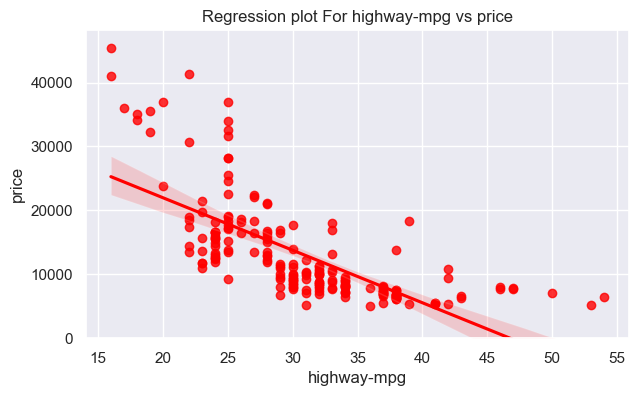

In [69]:
plt.figure(figsize=(7, 4))
sns.regplot(x="highway-mpg", y="price", data=df, color = "Red").set(title = "Regression plot for highway-mpg vs price")
plt.ylim(0)
plt.show()

The above plot shows the variables are negatively correlated.

How scattered the points are around the regression line is an indicator of the variance of the data, and if a linear model is the best fit or not. If there is high data variance, a linear model might not be the best model for the data.

<b><u>2. RESIDUAL PLOTS</u> </b><br>
Are used to show the variance of the data.<br>
The difference between the observed value (y) and the predicted value (Yhat) is the residual (e). The residual is the distance from the data point to the fitted regression line.

Residuals are plotted on the vertical y-axis and the independent variable on the horizontal x-axis.

If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. <br>Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

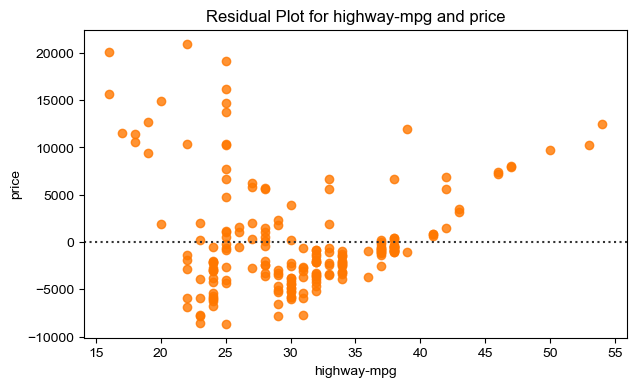

In [10]:
plt.figure(figsize=(7, 4))
sns.residplot(x = df["highway-mpg"], y = df["price"], color = "#FF7800").set(title = "Residual Plot for highway-mpg and price")
sns.set_theme(style="darkgrid")

The above shows that the residuals are <b>not</b> randomly distributed around the x-axis, <br>suggesting a non-linear model may be more appropriate for the data.

In [11]:
#creating another linear model for engine-size and price

lm_enginesize = LinearRegression()
x = df[["engine-size"]]
y = df["price"]
lm_enginesize.fit(x,y)

LinearRegression()

In [12]:
Y_hat = lm_enginesize.predict(x)
Y_hat[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [13]:
print("The intercept is:", lm_enginesize.intercept_)
print("The coefficient is:", lm_enginesize.coef_)

The intercept is: -7963.338906281046
The coefficient is: [166.86001569]


The linear function for this feature is therefore Yhat = (-7963.34) + 166.86*x

<b><u>Visualisation of the engine-size linear model</u></b>

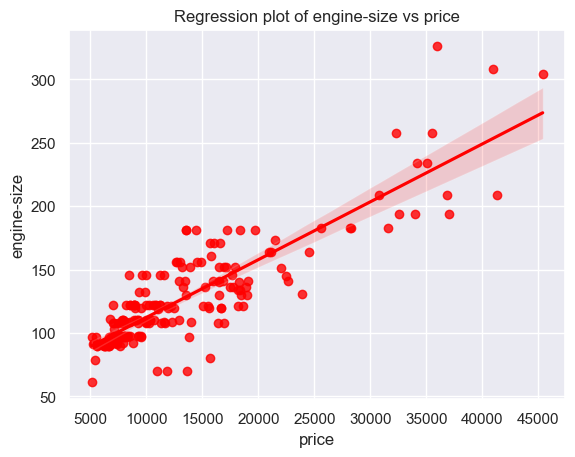

In [71]:
engsizereg = sns.regplot(x = "price", y = "engine-size", data = df, color = "Red")
engsizereg.set_title("Regression plot of engine-size vs price")
sns.set_style("darkgrid")
plt.show()

The above plot shows a strong positive linear relationship, therefore a linear model is likely to be a good fit for the data.

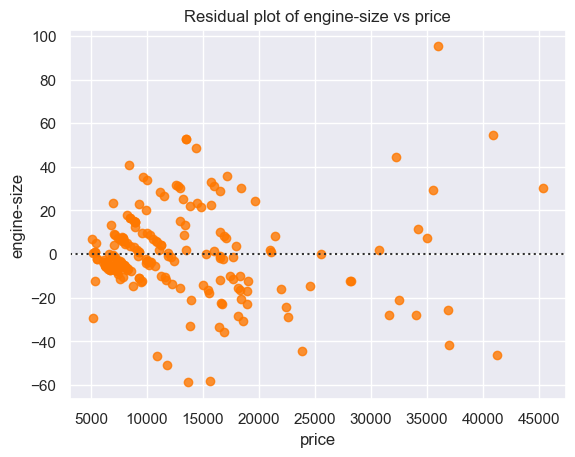

In [70]:
engsizeresid = sns.residplot(x = "price", y = "engine-size", data = df, color = "#FF7800")
engsizeresid.set_title("Residual plot of engine-size vs price")
plt.show()

The above residual plot shows points randomly distributed around the x axis <br>(although there is more data to the left hand side of the graph) suggesting a linear model is appropriate for the data.

<b>3. Multiple Linear Regression</b><br>
<i>Predicting car price using more than one variable.</i><br>
Multiple Linear Regression function: 𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋3+𝑏4𝑋4<br>

From the previous notebook: Step 2 - Exploratory Analysis <i>[Step2_exploratoryanalysis_cars]</i><br>we concluded that Horsepower, Curb-weight, Engine-size and Highway-mpg were good indicators of car price.


In [16]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']] #define the predictor variables
mult_lm = LinearRegression() #create the object
mult_lm.fit(Z, df["price"]) #fit the model

LinearRegression()

In [17]:
mult_lm.intercept_

-15806.624626329194

In [72]:
mult_lm.coef_ #returns coefficients of all 4 variables

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

Therefore, the estimated linear function is: <br>
Yhat(Price) = (-15806.62) + 53.49*horsepower + 4.69878948*curb-weight + 81.95906216*engine-size + 33.58258185*highway-mpg


<b><u>4. DISTRIBUTION PLOTS - Visualisation of the multiple linear regression model</u></b><br>
Multiple regression models can be visualised using distribution plots. We can look at the distribution of the fitted values from the model, and compare it to the distribution of the actual values.

In [19]:
Y_hat = mult_lm.predict(Z)

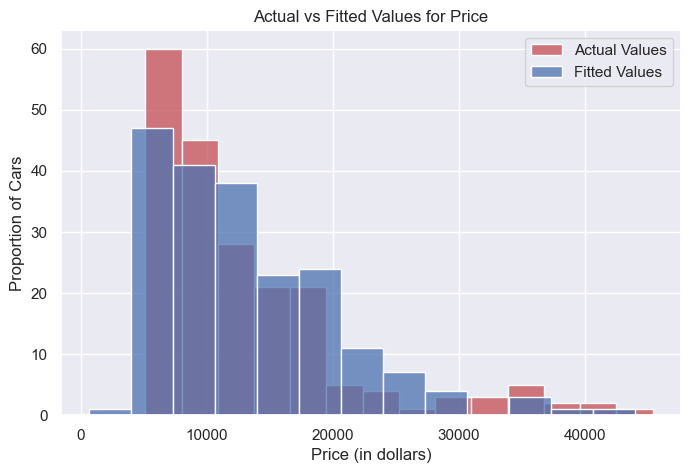

In [73]:
#distribution plot for 'horsepower', 'curb-weight', 'engine-size', 'highway-mpg'
width = 8
height = 5
plt.figure(figsize=(width, height))


dist1 = sns.histplot(df['price'], color="r", label="Actual Values")
sns.histplot(Y_hat, color="b", label = "Fitted Values" , ax=dist1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
dist1.legend(['Actual Values', 'Fitted Values'])

plt.show()
plt.close()

The above distribution plot shows that the fitted values are reasonably close to the actual values since the two distributions overlap. However, there is room for improvement in the model.

In [21]:
#another multiple linear regression using different features
z1 = df[['width','height','length']] #define features to be used
mult_lm2 = LinearRegression() #create the object
mult_lm2.fit(z1, df['price']) #fit the model

LinearRegression()

In [22]:
mult_lm2.intercept_

-120723.8603120674

In [23]:
mult_lm2.coef_

array([140842.56973998,   -618.82490275,  45770.36384183])

The equation for this multiple regression linear model is Yhat = (-120723.86) + 140842.56*width + (-618.82)*height + 45770.36*length 

In [24]:
Y_hat2 = mult_lm2.predict(z1) #make a prediction 

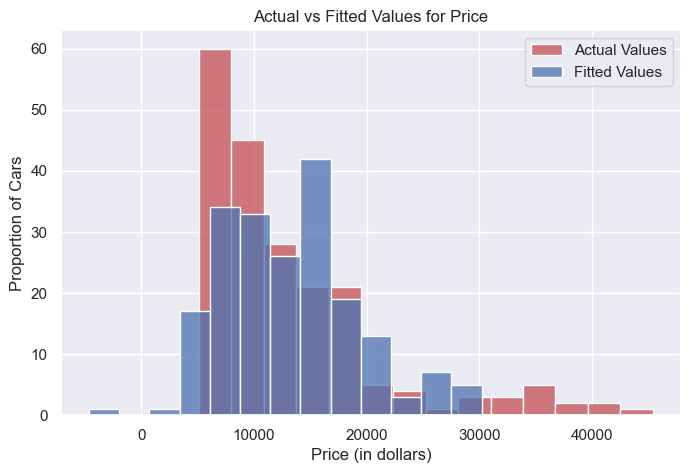

In [25]:
width = 8
height = 5
plt.figure(figsize=(width, height))

dist2 = sns.histplot(df['price'], color = 'r', label = 'actual')
sns.histplot(Y_hat2, color = 'b', label = 'fitted', ax = dist2)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
dist2.legend(['Actual Values', 'Fitted Values'])

plt.show()
plt.close()

The above distribution plot shows that some fitted values are reasonably close to the actual values, particularly around the 10000-25000 dollar range, where the values overlap the most. <br>
A downfall of this model is there are no fitted values after around 30,000 dollars, therefore the model cannot be used to predict car prices after this value. Again, there is room for improvement in the model.

<b>5. Polynomial regression </b><br>
Earlier, it was demonstrated that a linear model was not the best fit for "highway-mpg" as the predictor variable.
Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.<br>
We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

In [89]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100) #Generates 100 evenly spaced values between 15-55. Create
                                     #smooth curve for the fitted polynomial.
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial fit for highway-mpg vs price')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898)) #Sets the background color of the plot to light gray.
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [82]:
#get the variables
x = df['highway-mpg']
y = df['price']

In [83]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


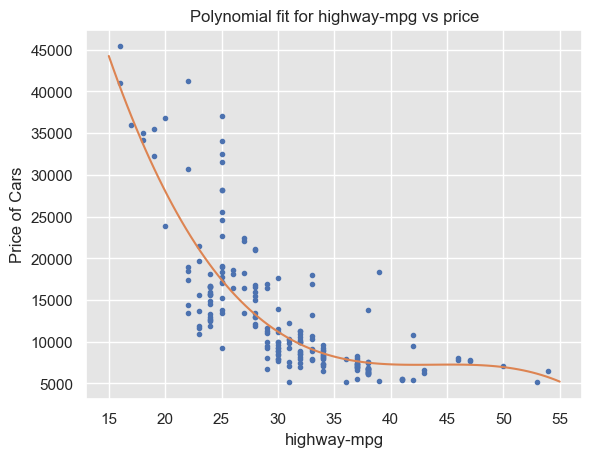

In [90]:
#plot the function 
PlotPolly(p, x, y, 'highway-mpg')

this polynomial model performs better than the linear model because the generated polynomial function "hits" more of the data points.

<b>6. Evaluation of predictive models</b><br>
It is important to evaluate the accuracy of our models if they are intended for application in real-world situations.

<b>R squared</b>, or the coefficient of determination, indicates how close the data is to the fitted regression line.
The value of R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.
<br>
<b>Mean Squared Error (MSE)/</b> measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).<br>
LIMITATIONS
- R-squared should be considered in the context of the nature of the data, an it is essential to complement R-squared with other analyses and consider the domain context to fully understand the performance of a model.

In [30]:
#import modules 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [31]:
#highway_mpg linear model evaluation
lm_highwaympg.fit(X, Y)
print('The highway-mpg linear model R-squared is:', lm_highwaympg.score(X, Y)) #function used to calculate R-squared

The highway-mpg linear model R-squared is: 0.4965911884339176


An R-squared of 0.4965 means that 49.65% of the variability in the dependent variable is accounted for by the linear regression model, leaving approximately 50.35% unexplained.

In [32]:
Yhat=lm_highwaympg.predict(X)
print('The output of the first 4 predicted values are: ', Yhat[0:4])

#compare the above results with actual results
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The output of the first 4 predicted values are:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]
The mean square error of price and predicted value is:  31635042.944639888


<b>Interpretation of the R-squared and MSE for for the highway-mpg linear model</b><br>
The MSE is large, suggesting that the model's predictions have substantial errors.
Possible reasons could be that the feature does not have an entirely linear releationship with price, and thus the data is under or overfitted, outliers may be affecting the model's performance, and this is in line with what we see in the highway-mpg linear model. 

In [33]:
#evaluation of the multiple linear regression model of 'horsepower', 'curb-weight', 'engine-size', 'highway-mpg'

#R-squared
mult_lm.fit(Z, df['price'])
print('The R-squared for the first multiple regression model is is: ', mult_lm.score(Z, df['price']))

#MSE
Y_predict_multifit = mult_lm.predict(Z)
print('The mean square error of price and predicted value for this model is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The R-squared for the first multiple regression model is is:  0.8093562806577457
The mean square error of price and predicted value for this model is:  11980366.87072649


In [34]:
#evaluation of the multiple linear regression model of 'width','height','length'
mult_lm2.fit(z1, df['price'])
# Find the R-squared
print('The R-squared for the second multiple regression model is is: ', mult_lm2.score(z1, df['price']))

#MSE
Y_predict_multifit = mult_lm2.predict(z1)
print('The mean square error of price and predicted value for this model is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The R-squared for the second multiple regression model is is:  0.5983080006590291
The mean square error of price and predicted value for this model is:  25242990.10606761


From above, we can see the first multiple regression model has an R-squared of 0.8, meaning 80.896% of the variation of price is explained by this multiple linear regression.

The second model has an R-squared of 0.59, meaning only 59% of price variation is explained by the model.

The MSE for the first model is also much lower than the second model, suggesting it is more accurate.

In [80]:
#Evaluation of the polynomial regression

#R-squared
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

#MSE
MSE = mean_squared_error(df['price'], p(x))
print('The MSE is: ', MSE)

The R-square value is:  0.6420292857256682
The MSE is:  236536282.46626472


<b><u>CONCLUSIONS</b></u><br>

The evaluation suggests that out of the two multiple regression models, the first model is a better model to use to predict price of cars, and the features we used in the model are better predictors of price compared with the second model. 
<br>Both of these models are also better fits compared with the simple highway-mpg regression model.